# Probabilistic Models – Spring 2022
## Exercise Session 4
Feb 22nd return by 12.00. Session at 14.15.

<span style="color:red">**Enrico Buratto**</span>

### Instructions
Make sure the notebook produces correct results when ran sequentially starting from the first cell. You can ensure this by clearing all outputs, running all cells, and finally correcting any errors.

To get points:
1. Submit your answers to the automatically checked Moodle test. 
 - You have 5 tries on the test: the highest obtained score will be taken into account.
 - For numerical questions the tolerance is $1\cdot10^{-4}$.
2. Submit this notebook containing your derivations to Moodle.

**Exercises 4 and 5 are checked completely manually: in the corresponding Moodle questions return "1" if you have done the exercise. The points that you get for the exercises are then subject to change as we check the notebooks. Also your notebooks for the other problems will be checked, so that for example in 1 you used the asked algorithm, instead of computing the value through the joint distribution.**

## Exercise 1
***

Compute $P(C,D)$ for the following BN using plain factor elimination without network pruning.

![](4.1.svg)

The factors for the BN are:

In [1]:
!for v in {A..E}; do echo "data/f"$v".tsv"; cat "data/f"$v".tsv"; echo ""; done

data/fA.tsv
A	fA
0	.6
1	.4

data/fB.tsv
B	fB
0	.5
1	.5

data/fC.tsv
A	B	C	fC
0	0	0	.9
0	0	1	.1
0	1	0	.1
0	1	1	.9
1	0	0	.5
1	0	1	.5
1	1	0	.3
1	1	1	.7

data/fD.tsv
C	D	fD
0	0	.2
0	1	.8
1	0	.7
1	1	.3

data/fE.tsv
C	E	fE
0	0	.1
0	1	.9
1	0	.2
1	1	.8



Report in Moodle $P(C=0, D=0)$.

You can implement the algorithm programmatically or just use it "on paper". 

In [169]:
import pandas as pd
import numpy as np

fA = pd.read_csv('./data/fA.tsv', sep='\t')
fB = pd.read_csv('./data/fB.tsv', sep='\t')
fC = pd.read_csv('./data/fC.tsv', sep='\t')
fD = pd.read_csv('./data/fD.tsv', sep='\t')
fE = pd.read_csv('./data/fE.tsv', sep='\t')

# First iteration: fA x fC
fC['fC'] = fC['fC']*fC.merge(fA)['fA']

# Second iteration: fB x fC
fC['fC'] = fC['fC']*fC.merge(fB)['fB']

# Third iteration: fD ← fD × ∑_v fC where V={A,B}
s = fC.groupby('C')['fC'].sum()
s = pd.DataFrame(np.array([[0, 1],[s[0], s[1]]]).T, columns=['C', 'fC'])
fD['fD'] = fD['fD']*fD.merge(s)['fC']

# Fourth iteration: fD ← fD × ∑_v fE where V={E}
s = fE.groupby('C')['fE'].sum()
s = pd.DataFrame(np.array([[0, 1],[s[0], s[1]]]).T, columns=['C', 'fE'])
fD['fD'] = fD['fD']*fD.merge(s)['fE']

# End: projection, it's already done
final = fD.copy()

# Task a
print('P(C=0, D=0) =', final[(final['C']==0) & (final['D']==0)]['fD'].values[0])

P(C=0, D=0) = 0.09200000000000001


,C,D,fD
0,0,0,0.092
1,0,1,0.368
2,1,0,0.378
3,1,1,0.162


## Exercise 2
***

Based on your previous or upcoming calculation, what is $P(C|D=1)$?

In [181]:
# We have that P(C|D=1) = P(C, D=1)/P(D=1)

# P(C, D=1)
d1 = final[final['D']==1]

# P(D=1)
p = d1['fD'].sum()

# Div -> calculating posteriors
post = d1['fD']/p

# Task a
print('P(C|D=1) =', post[1]) # TODO if doesn't work: change to 3 (I don't get which is which)

P(C|D=1) = 0.6943396226415095


## Exercise 3
***

Consider the BN of task 1. One elimination tree for this DAG is given by the following. 

![](4.3.png)

Calculate all messages used by message passing factor elimination over the elimination tree.

Either compute the messages programmatically or manually. 


In [8]:
# Provide your answer in cells here


Concerning the message passing factor elimination run, calculate the cluster marginals. Check that all agree with $P(C)$.

From the computed cluster marginals report in moodle:
- $P(A=0)$
- $P(C=1, D=0)$
- $P(C=0, E=1)$
- $P(A=1, B=0, C=1)$

In [9]:
# Provide your answer in cells here

## Exercise 4
***

Find a jointree for the following DAG. Mark the clusters, separators and factors. How does the tree change if you want to calculate $P(A,E)$ (i.e., if $A$ and $E$ have to appear in the same cluster)?

![](4.5.1.svg)

You can draw the jointree using which ever tool and then embed the image to the notebook (check this cell for an example on how to embed images). Alternatively, install the [Python interface to graphviz](https://graphviz.readthedocs.io/en/stable/manual.html) and [graphviz](https://www.graphviz.org/) itself. After successful installation, running the next cell (which you can use as an example) should output the following image:

![](4.5.2.svg)

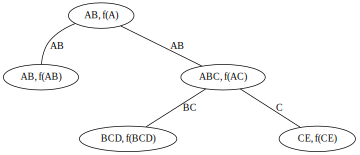

In [183]:
# Graphviz example

import graphviz

g = graphviz.Graph(engine='dot', 
                   graph_attr={'rankdir':'TB', 
                               'size':'5', 'nodesep':'2'})

g.node("AB, f(A)")
g.node("AB, f(AB)")
g.node("ABC, f(AC)")
g.node("BCD, f(BCD)")
g.node("CE, f(CE)")

g.edge("AB, f(A)", "AB, f(AB)", label="AB")
g.edge("AB, f(A)", "ABC, f(AC)", label="AB")
g.edge("ABC, f(AC)", "BCD, f(BCD)", label="BC")
g.edge("ABC, f(AC)", "CE, f(CE)", label="C")


g

### Answer

![](ex4.jpg)

If A and E have to appear on the same cluster, we could have the following jointree (we can start from step 2 of the task above forcing E to be present in every cluster that contains A):

![](ex4_2.jpg)

## Exercise 5
***

Prune the following DAG with respect to query $P(B,E \mid A=T)$.

![](4.6.svg)

Again, draw the pruned DAG in steps explaining each action, using which ever tool (e.g., graphviz).

In [ ]:
# Provide your answer in cells here

## Exercise 6
***

Consider the following training data set $D$:


In [5]:
!cat data/6.train.tsv

X1	X2	X3	X4	Y
0	0	0	1	1
0	1	0	0	2
0	1	0	1	1
0	1	1	0	2
1	0	0	0	1
1	0	0	1	1
1	0	1	1	1
1	1	0	0	3
1	1	0	1	1
1	1	1	0	2


Consider  the  DAG  of  a  Naive  Bayes  classifier  structure  where $Y$ is the class. Learn parameters of the Bayesian network:

- (a) Using maximum likelihood estimation.
  - Report $P(X_3=1 \mid Y=1)$
- (b) Using the Bayesian Estimate with the BDeu prior using equivalent sample size of 1.
  - Report $P(X_4=1 \mid Y=2)$
- (c) Determine which estimate gives the higher likelihood (or log-likelihood) for the following test set.

In [182]:
!cat data/6.test.tsv

X1	X2	X3	X4	Y
0	0	0	0	1
0	0	1	0	2
0	0	1	1	1
0	1	1	1	2
1	0	1	0	3
1	1	1	1	2


In [7]:
# Provide your answer in cells here